**Generate a noisy dataset**

In [113]:

#Create noisy dataset
import numpy as np

def generate_noise():
  lower_end = 10
  upper_end = 100
  number_of_samples = 16000

  #Generating random values for predictors
  x1 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x2 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x3 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x4 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x5 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x6 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x7 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x8 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x9 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x10 = np.random.uniform(lower_end,upper_end,number_of_samples)
  x11 = np.random.uniform(lower_end,upper_end,number_of_samples)

  #Collating all predictors into one array
  x_noise = np.column_stack([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11])

  #Generating random values for labels with class imbalance of 40:60 for 0 and 1 respectively
  choices = [0,1]
  p = [0.3,0.7]
  y_noise = np.random.choice(choices,number_of_samples,p=p)

  return x_noise, y_noise

x_noise, y_noise = generate_noise()

In [86]:
x_noise.shape,y_noise.shape

((4000, 11), (4000,))

**Implementation**
Concept - Federated Learning, Homomorphic Encryption
;Data - Loan Default Data
;Model - Tensorflow Keras Sequential Neural Network Model
;Custom Functions - Generate Clients, Add Samples to existing clients

**Import cleaned dataset, remove NA values, and split dataset into training and holdout set**

In [87]:
#Import normalized dataset and divide into x (predictors) and y(predicted)
import numpy as np
import pandas as pd
df = pd.read_csv('dataset.csv',header= None,skiprows=1)

In [88]:
#Dataframe with 32581 observations having 11 features and 1 predicted variable (loan default)
df.shape

(32581, 12)

In [89]:
#Check dataframe for null values and drop null values
df
df.isnull().any()
df2 = df.dropna()
df2.shape

(28638, 12)

In [90]:
#Check shape of new dataframe
df2.shape

(28638, 12)

In [91]:
#Check new dataframe
df2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.59,1,0,0,0,1,1
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.10,0,0,0,1,0,0
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.57,0,1,0,0,0,1
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.53,0,0,0,0,1,1
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.55,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.298387,0.008172,0.008130,0.153623,0.434831,0.11,0,1,0,0,0,0
32577,0.274194,0.019346,0.032520,0.496377,0.116292,0.15,0,1,0,0,0,0
32578,0.362903,0.012008,0.024390,1.000000,0.312921,0.46,0,0,0,0,1,1
32579,0.290323,0.024350,0.040650,0.420290,0.340449,0.10,0,1,0,0,0,0


In [92]:
#Create a holdout set for evaluation to find loss and accuracy at each aggregator epoch
from sklearn.model_selection import train_test_split
df_train, df_holdout = train_test_split(df2, test_size=0.3, random_state=42)
df_train.shape,df_holdout.shape

((20046, 12), (8592, 12))

In [93]:
#Define x_holdout and y_holdout from df_holdout

x_holdout = df_holdout.drop(df_holdout.columns[11], axis=1)
y_holdout = df_holdout[df_holdout.columns[11]]
df_holdout.shape,x_holdout.shape,y_holdout.shape
y_holdout.value_counts()

11
0    6715
1    1877
Name: count, dtype: int64

In [94]:
#Convert x_holdout and y_holdout to array
x_holdout = x_holdout.to_numpy()
y_holdout = y_holdout.to_numpy()
type(x_holdout),type(y_holdout)

(numpy.ndarray, numpy.ndarray)

In [95]:
#Check shape of training set
df_train.shape

(20046, 12)

In [96]:
# Drop predicted variable to create x
x1 = df_train.drop(df.columns[11], axis=1)
# Keep predicted variable to create y
y1 = df_train[df_train.columns[11]]

In [98]:
#Convert x and y from dataframe to numpy array and check if conversion is successful
x = x1.to_numpy()
y = y1.to_numpy()
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [100]:
x,y

(array([[0.12903226, 0.07104737, 0.01626016, ..., 0.        , 0.        ,
         1.        ],
        [0.08064516, 0.00733823, 0.00813008, ..., 0.        , 0.        ,
         1.        ],
        [0.03225807, 0.00957305, 0.00813008, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.01612903, 0.00333556, 0.00813008, ..., 0.        , 1.        ,
         0.        ],
        [0.08064516, 0.03685791, 0.01626016, ..., 0.        , 0.        ,
         1.        ],
        [0.10483871, 0.0188459 , 0.13821138, ..., 0.        , 0.        ,
         0.        ]]),
 array([0, 0, 0, ..., 0, 0, 0]))

**Build a client side model**

In [101]:
#Client side model
import tensorflow
def client_side_model(initial_weights = None):

  client_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Input((11,)),
    tensorflow.keras.layers.Dense(4, activation="relu"),
    tensorflow.keras.layers.Dense(2, activation="relu"),
    tensorflow.keras.layers.Dense(1, activation="sigmoid")
  ])

  client_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

  if initial_weights != None:

    client_model.set_weights(initial_weights)

  return client_model

client_side_model()



**Build an Aggregator side model (also called as Centralized Server)**

In [102]:
#Aggregator model / Centralized model

def build_aggregator_model():

  aggregator_model = client_side_model()

  weights = aggregator_model.get_weights()

  weights = [0*i for i in weights]

  aggregator_model.set_weights(weights)

  return aggregator_model

build_aggregator_model()

**Simulate 5 clients by dividing the dataset into 5 client datasets containing equal number of random samples without replacement**

In [103]:
#Generate multiple clients to simulate federated learning

number_of_clients = 5

number_of_samples = 10000

number_of_samples_per_client = number_of_samples // number_of_clients

def generate_clients(number_of_clients,x,y):

  #Create a dictionary with key as client # and value as indices
  clients = {i:[] for i in range(number_of_clients)}

  #Set initial indices equal to number of rows of x
  indices = np.arange(x.shape[0])

  #Assign equal number of random samples from x to each client
  for client in clients.keys():

    clients[client] = np.random.choice(indices,
                                          number_of_samples_per_client,
                                          replace = False)
    #Update indices to all indices except the ones assigned to current client
    indices = np.array([i for i in indices if i not in clients[client]])

  #Generate a new client dictionary to store respective x and y values for each client
  clients_dataset = {}

  for client in clients.keys():

    clients_dataset.update({client: [x[clients[client]],y[clients[client]]]})

  return clients_dataset,clients,indices

#Show dataset for client 0
#generate_clients(number_of_clients,x,y)[0]

**Define function to add 500 new samples without replacement for every aggregator iteration from aggregator round 2**

In [104]:
#Add 500 new samples to each client
def add_samples(clients_dataset,client_indices,unpicked_indices):
  #Create new indices and append to existing indices
  for indices in client_indices.keys():
    #Store original indices in a new variable
    original_indices = np.array(client_indices[indices])
    #Generate additional 500 indices by random choice
    additional_indices = np.random.choice(unpicked_indices,500,replace = False)
    #Append the additional 500 indices to original indices
    client_indices[indices] = np.concatenate((original_indices,additional_indices))
    #Check length to check  if new indices are added successfully
    #print(len(client_indices[indices]))
    #Update the unpicked_indices by excluding the picked indices
    unpicked_indices = np.array([i for i in unpicked_indices if i not in client_indices[indices]])
    #Check length of unpicked_indices to check if the count is reducing
    #print(len(unpicked_indices))
  #Update the client dataset with new observations
  for client in clients_dataset.keys():
    clients_dataset.update({client: [x[client_indices[client]],y[client_indices[client]]]})
    #print(clients_dataset[client][0].shape)
  return clients_dataset

**Import package and define function to generate homomorphically encrypted data**

In [52]:
#Import homomorphic encryption package
!pip install tenseal

In [53]:
#Create recursive function to calculate a store the encrypted weights in a list
import tenseal as ts

def encrypt_list(weighted_list):
    for element in weighted_list:
        if isinstance(element, list):
            #print("the element list: ", element)
            encrypt_list(element)
        else:
            #print("the element value: ", element)
            context = ts.context(ts.SCHEME_TYPE.BFV, poly_modulus_degree=4096, plain_modulus=1032193)
            context.generate_galois_keys()
            enc_weights = ts.bfv_vector(context, [element])

    return weighted_list

In [105]:
#Custom Function to calculate metrics based on custom threshold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss
def custom_metrics(model, y_true, x_holdout, threshold):
  #Predict probabilities of y based on x_holdout
  y_pred_prob = model.predict(x_holdout)
  #Convert probabilities to prediction using custom threshold
  y_pred = (y_pred_prob > threshold).astype(int)
  #Calculate metrics
  #accuracy
  accuracy = accuracy_score(y_true, y_pred)
  #loss
  loss = log_loss(y_true, y_pred_prob)
  #precision
  precision = precision_score(y_true, y_pred, zero_division=0)
  #recall
  recall = recall_score(y_true, y_pred, zero_division=0)
  #F1-Score
  f1 = f1_score(y_true, y_pred, zero_division=0)

  return accuracy, loss, precision, recall, f1


**Build a federated learning model using Aggregator model, Client model, Randomly sampled clients (2000 observations each initially), and add 500 new samples to each client at every iteration**

In [55]:
#Execute a Federated Learning model

from tqdm import trange

#Total number of training rounds between aggregator model and client model
aggregator_epochs = 5
#Number of epochs for each client model
client_epochs = 20

#Empty dictionary with client # as key and client_weights as value
client_weights = {client: None for client in range(number_of_clients)}
#Empty lists to store loss and accuracy at each epoch
aggregator_loss = []
aggregator_accuracy = []
aggregator_precision = []
aggregator_recall = []
aggregator_f1 = []
#Instantiate aggregator model
aggregator_model = build_aggregator_model()
#Set default weights for aggregator model
aggregator_weights = aggregator_model.get_weights()

#Divide client dataset into number of clients
clients_dataset,client_indices,unpicked_indices = generate_clients(number_of_clients,x,y)

for epoch in trange(aggregator_epochs, desc="Aggregator Model"):

  samples_per_client_epoch = clients_dataset[0][0].shape[0]
  print("\n")
  print("For Epoch {}, each client contains {} samples".format(epoch,samples_per_client_epoch))

  for client in client_weights.keys():

    #Initially 0 but later will update
    weight = client_weights[client]
    #Set weights for each client epoch
    client_model =  client_side_model(weight)
    #Train the model on respective client dataset ~ 0 is for x and 1 is for y
    client_model.fit(clients_dataset[client][0],
                    clients_dataset[client][1],
                    epochs = client_epochs, verbose = False,
                    validation_split=0.1)
    #Update the client weight which was initially zero with newly trained weights
    client_weights[client] = client_model.get_weights()
    #Reset client model for current client epoch to prepare for next client epoch
    client_model = None
    print("\n")
    print("Client {} weights updated for Aggregator Epoch {}".format(client,epoch))

  client_weights = encrypt_list(client_weights)

  #enc_weights = ts.bfv_vector(context, client_weights[client])

  #Calculate the mean of all client weights and store as aggregator weights
  aggregator_weights = [np.mean([client_weights[client][index] for client in range(number_of_clients)],
                                  axis = 0) for index in range(len(aggregator_weights))]
  print("\n")
  print("Mean weights calculated for Aggregator Epoch {}".format(epoch))
  #Set the weights for the aggregator model for each epoch
  aggregator_model.set_weights(aggregator_weights)
  print("\n")
  print("Aggregator weights updated for Aggregator Epoch {}".format(epoch))
  #Calculate the loss and accuracy for each epoch of aggregator model
  #loss, accuracy = aggregator_model.evaluate(x_holdout,y_holdout,verbose=False)
  accuracy, loss, precision, recall, f1 = custom_metrics(aggregator_model,y_holdout,x_holdout,0.4)
  print("\n")
  print("For Aggregator Epoch {} the loss is {}, the accuracy is {}, the precision is {}, the recall is {}, the F1-score is {}".format(epoch,loss,accuracy,precision,recall,f1))
  #Store the loss and accuracy at every epoch in respective lists
  aggregator_loss.append(loss)
  aggregator_accuracy.append(accuracy)
  aggregator_precision.append(precision)
  aggregator_recall.append(recall)
  aggregator_f1.append(f1)
  #Set all client weights equal to aggregator weights
  client_weights = {client: aggregator_weights for client in client_weights.keys()}
  print("\n")
  print("Client weights updated for Aggregator Epoch {}".format(epoch))

  #Add additional 500 samples to each client
  if epoch != aggregator_epochs - 1:
    clients_dataset = add_samples(clients_dataset,client_indices,unpicked_indices)


Aggregator Model:   0%|          | 0/5 [00:00<?, ?it/s]



For Epoch 0, each client contains 2000 samples


Client 0 weights updated for Aggregator Epoch 0


Client 1 weights updated for Aggregator Epoch 0


Client 2 weights updated for Aggregator Epoch 0


Client 3 weights updated for Aggregator Epoch 0


Client 4 weights updated for Aggregator Epoch 0


Mean weights calculated for Aggregator Epoch 0


Aggregator weights updated for Aggregator Epoch 0
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 0 the loss is 0.563507865418712, the accuracy is 0.7925977653631285, the precision is 0.5891181988742964, the recall is 0.16728822589238146, the F1-score is 0.26058091286307056


Client weights updated for Aggregator Epoch 0


Aggregator Model:  20%|██        | 1/5 [00:43<02:54, 43.74s/it]



For Epoch 1, each client contains 2500 samples


Client 0 weights updated for Aggregator Epoch 1


Client 1 weights updated for Aggregator Epoch 1


Client 2 weights updated for Aggregator Epoch 1


Client 3 weights updated for Aggregator Epoch 1


Client 4 weights updated for Aggregator Epoch 1


Mean weights calculated for Aggregator Epoch 1


Aggregator weights updated for Aggregator Epoch 1
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 1 the loss is 0.40558642393138566, the accuracy is 0.837756052141527, the precision is 0.701082431307244, the recall is 0.4485881726158764, the F1-score is 0.5471085120207928


Client weights updated for Aggregator Epoch 1


Aggregator Model:  40%|████      | 2/5 [01:08<01:37, 32.66s/it]



For Epoch 2, each client contains 3000 samples


Client 0 weights updated for Aggregator Epoch 2


Client 1 weights updated for Aggregator Epoch 2


Client 2 weights updated for Aggregator Epoch 2


Client 3 weights updated for Aggregator Epoch 2


Client 4 weights updated for Aggregator Epoch 2


Mean weights calculated for Aggregator Epoch 2


Aggregator weights updated for Aggregator Epoch 2
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 2 the loss is 0.38249910988743446, the accuracy is 0.8378724394785847, the precision is 0.6598414795244386, the recall is 0.5322322855620671, the F1-score is 0.5892067236803302


Client weights updated for Aggregator Epoch 2


Aggregator Model:  60%|██████    | 3/5 [01:38<01:02, 31.41s/it]



For Epoch 3, each client contains 3500 samples


Client 0 weights updated for Aggregator Epoch 3


Client 1 weights updated for Aggregator Epoch 3


Client 2 weights updated for Aggregator Epoch 3


Client 3 weights updated for Aggregator Epoch 3


Client 4 weights updated for Aggregator Epoch 3


Mean weights calculated for Aggregator Epoch 3


Aggregator weights updated for Aggregator Epoch 3
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 3 the loss is 0.3739245777866403, the accuracy is 0.8375232774674115, the precision is 0.6572923479398299, the recall is 0.5354288758657432, the F1-score is 0.5901350557839107


Client weights updated for Aggregator Epoch 3


Aggregator Model:  80%|████████  | 4/5 [02:07<00:30, 30.48s/it]



For Epoch 4, each client contains 4000 samples


Client 0 weights updated for Aggregator Epoch 4


Client 1 weights updated for Aggregator Epoch 4


Client 2 weights updated for Aggregator Epoch 4


Client 3 weights updated for Aggregator Epoch 4


Client 4 weights updated for Aggregator Epoch 4


Mean weights calculated for Aggregator Epoch 4


Aggregator weights updated for Aggregator Epoch 4
269/269 [==============================] - 0s 1ms/step


Aggregator Model: 100%|██████████| 5/5 [02:43<00:00, 32.69s/it]



For Aggregator Epoch 4 the loss is 0.3697218193512473, the accuracy is 0.837756052141527, the precision is 0.657328990228013, the recall is 0.537559936068194, the F1-score is 0.5914419695193435


Client weights updated for Aggregator Epoch 4


In [56]:
#Print the lists of accuracy, loss, precision, recall, F1-Score
metrics_df = pd.DataFrame(list(zip(aggregator_accuracy,aggregator_loss,aggregator_precision,aggregator_recall,aggregator_f1)),columns=['accuracy','loss','precision','recall','f1'])
metrics_df

,accuracy,loss,precision,recall,f1
0,0.792598,0.563508,0.589118,0.167288,0.260581
1,0.837756,0.405586,0.701082,0.448588,0.547109
2,0.837872,0.382499,0.659841,0.532232,0.589207
3,0.837523,0.373925,0.657292,0.535429,0.590135
4,0.837756,0.369722,0.657329,0.537560,0.591442


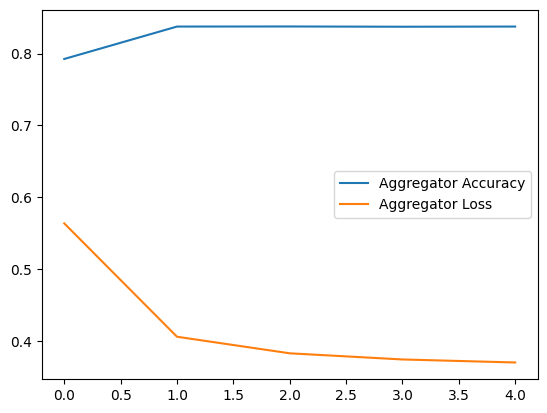

In [57]:
#Visualize federated learning model i.e. final aggregator model
import matplotlib.pyplot as pyplot
pyplot.plot(range(len(aggregator_accuracy)), aggregator_accuracy, label="Aggregator Accuracy")
pyplot.plot(aggregator_loss, label="Aggregator Loss")
pyplot.legend()
pyplot.show()

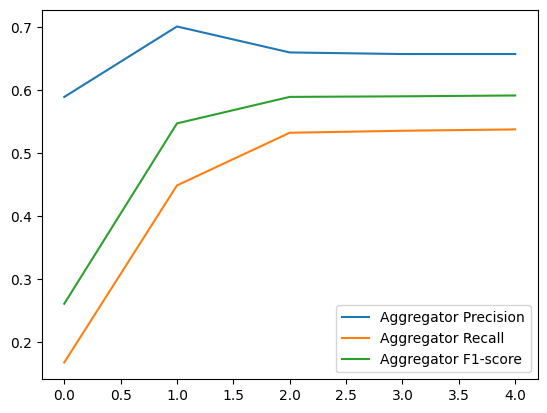

In [58]:
pyplot.plot(range(len(aggregator_precision)), aggregator_precision, label="Aggregator Precision")
pyplot.plot(aggregator_recall, label="Aggregator Recall")
pyplot.plot(aggregator_f1, label="Aggregator F1-score")
pyplot.legend()
pyplot.show()

**Effect of Noise**

In [115]:
#Execute a Federated Learning model

from tqdm import trange

#Total number of training rounds between aggregator model and client model
aggregator_epochs = 5
#Number of epochs for each client model
client_epochs = 20

#Empty dictionary with client # as key and client_weights as value
client_weights = {client: None for client in range(number_of_clients)}
#Empty lists to store loss and accuracy at each epoch
aggregator_loss = []
aggregator_accuracy = []
aggregator_precision = []
aggregator_recall = []
aggregator_f1 = []
#Instantiate aggregator model
aggregator_model = build_aggregator_model()
#Set default weights for aggregator model
aggregator_weights = aggregator_model.get_weights()

#Divide client dataset into number of clients
clients_dataset,client_indices,unpicked_indices = generate_clients(number_of_clients,x,y)

for epoch in trange(aggregator_epochs, desc="Aggregator Model"):

  samples_per_client_epoch = clients_dataset[0][0].shape[0]
  print("\n")
  print("For Epoch {}, each client contains {} samples".format(epoch,samples_per_client_epoch))

  for client in client_weights.keys():

    #Initially 0 but later will update
    weight = client_weights[client]
    #Set weights for each client epoch
    client_model =  client_side_model(weight)
    #Train the model on respective client dataset ~ 0 is for x and 1 is for y
    client_model.fit(clients_dataset[client][0],
                    clients_dataset[client][1],
                    epochs = client_epochs, verbose = False,
                    validation_split=0.1)
    #Update the client weight which was initially zero with newly trained weights
    client_weights[client] = client_model.get_weights()
    #Reset client model for current client epoch to prepare for next client epoch
    client_model = None
    print("\n")
    print("Client {} weights updated for Aggregator Epoch {}".format(client,epoch))

  client_weights = encrypt_list(client_weights)

  #enc_weights = ts.bfv_vector(context, client_weights[client])

  #Calculate the mean of all client weights and store as aggregator weights
  aggregator_weights = [np.mean([client_weights[client][index] for client in range(number_of_clients)],
                                  axis = 0) for index in range(len(aggregator_weights))]
  print("\n")
  print("Mean weights calculated for Aggregator Epoch {}".format(epoch))
  #Set the weights for the aggregator model for each epoch
  aggregator_model.set_weights(aggregator_weights)
  print("\n")
  print("Aggregator weights updated for Aggregator Epoch {}".format(epoch))
  #Calculate the loss and accuracy for each epoch of aggregator model
  #loss, accuracy = aggregator_model.evaluate(x_holdout,y_holdout,verbose=False)
  accuracy, loss, precision, recall, f1 = custom_metrics(aggregator_model,y_holdout,x_holdout,0.4)
  print("\n")
  print("For Aggregator Epoch {} the loss is {}, the accuracy is {}, the precision is {}, the recall is {}, the F1-score is {}".format(epoch,loss,accuracy,precision,recall,f1))
  #Store the loss and accuracy at every epoch in respective lists
  aggregator_loss.append(loss)
  aggregator_accuracy.append(accuracy)
  aggregator_precision.append(precision)
  aggregator_recall.append(recall)
  aggregator_f1.append(f1)
  #Set all client weights equal to aggregator weights
  client_weights = {client: aggregator_weights for client in client_weights.keys()}
  print("\n")
  print("Client weights updated for Aggregator Epoch {}".format(epoch))

  #Add additional 500 samples to each client
  if epoch != aggregator_epochs - 1:
    clients_dataset = add_samples(clients_dataset,client_indices,unpicked_indices)
  #Add noisy client
  if epoch == aggregator_epochs - 2:
    x_noise, y_noise = generate_noise()
    print("\n")
    print("Client 4 sending noisy data of 16000 samples")
    clients_dataset[4] = [x_noise,y_noise]


Aggregator Model:   0%|          | 0/5 [00:00<?, ?it/s]



For Epoch 0, each client contains 2000 samples


Client 0 weights updated for Aggregator Epoch 0


Client 1 weights updated for Aggregator Epoch 0


Client 2 weights updated for Aggregator Epoch 0


Client 3 weights updated for Aggregator Epoch 0


Client 4 weights updated for Aggregator Epoch 0


Mean weights calculated for Aggregator Epoch 0


Aggregator weights updated for Aggregator Epoch 0
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 0 the loss is 0.5654177099838988, the accuracy is 0.7815409683426443, the precision is 0.0, the recall is 0.0, the F1-score is 0.0


Client weights updated for Aggregator Epoch 0


Aggregator Model:  20%|██        | 1/5 [00:29<01:57, 29.41s/it]



For Epoch 1, each client contains 2500 samples


Client 0 weights updated for Aggregator Epoch 1


Client 1 weights updated for Aggregator Epoch 1


Client 2 weights updated for Aggregator Epoch 1


Client 3 weights updated for Aggregator Epoch 1


Client 4 weights updated for Aggregator Epoch 1


Mean weights calculated for Aggregator Epoch 1


Aggregator weights updated for Aggregator Epoch 1
269/269 [==============================] - 1s 2ms/step


For Aggregator Epoch 1 the loss is 0.4253717426926461, the accuracy is 0.8253026070763501, the precision is 0.7206572769953051, the recall is 0.3271177410761854, the F1-score is 0.4499816782704287


Client weights updated for Aggregator Epoch 1


Aggregator Model:  40%|████      | 2/5 [00:57<01:26, 28.92s/it]



For Epoch 2, each client contains 3000 samples


Client 0 weights updated for Aggregator Epoch 2


Client 1 weights updated for Aggregator Epoch 2


Client 2 weights updated for Aggregator Epoch 2


Client 3 weights updated for Aggregator Epoch 2


Client 4 weights updated for Aggregator Epoch 2


Mean weights calculated for Aggregator Epoch 2


Aggregator weights updated for Aggregator Epoch 2
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 2 the loss is 0.38989761138058077, the accuracy is 0.8391527001862198, the precision is 0.6756564939673527, the recall is 0.5071923281832712, the F1-score is 0.5794278758368837


Client weights updated for Aggregator Epoch 2


Aggregator Model:  60%|██████    | 3/5 [01:51<01:19, 39.93s/it]



For Epoch 3, each client contains 3500 samples


Client 0 weights updated for Aggregator Epoch 3


Client 1 weights updated for Aggregator Epoch 3


Client 2 weights updated for Aggregator Epoch 3


Client 3 weights updated for Aggregator Epoch 3


Client 4 weights updated for Aggregator Epoch 3


Mean weights calculated for Aggregator Epoch 3


Aggregator weights updated for Aggregator Epoch 3
269/269 [==============================] - 0s 1ms/step


For Aggregator Epoch 3 the loss is 0.377708197624493, the accuracy is 0.8393854748603352, the precision is 0.6662207357859532, the recall is 0.5306339904102291, the F1-score is 0.5907473309608541


Client weights updated for Aggregator Epoch 3


Aggregator Model:  80%|████████  | 4/5 [02:21<00:36, 36.36s/it]



Client 4 sending noisy data of 16000 samples


For Epoch 4, each client contains 4000 samples


Client 0 weights updated for Aggregator Epoch 4


Client 1 weights updated for Aggregator Epoch 4


Client 2 weights updated for Aggregator Epoch 4


Client 3 weights updated for Aggregator Epoch 4


Client 4 weights updated for Aggregator Epoch 4


Mean weights calculated for Aggregator Epoch 4


Aggregator weights updated for Aggregator Epoch 4
269/269 [==============================] - 0s 1ms/step


Aggregator Model: 100%|██████████| 5/5 [03:09<00:00, 37.88s/it]



For Aggregator Epoch 4 the loss is 0.6283071334859085, the accuracy is 0.556098696461825, the precision is 0.32074773274106977, the recall is 0.9232818327117741, the F1-score is 0.4760989010989011


Client weights updated for Aggregator Epoch 4


In [116]:
#Print the lists of accuracy, loss, precision, recall, F1-Score
metrics_df = pd.DataFrame(list(zip(aggregator_accuracy,aggregator_loss,aggregator_precision,aggregator_recall,aggregator_f1)),columns=['accuracy','loss','precision','recall','f1'])
metrics_df

,accuracy,loss,precision,recall,f1
0,0.781541,0.565418,0.000000,0.000000,0.000000
1,0.825303,0.425372,0.720657,0.327118,0.449982
2,0.839153,0.389898,0.675656,0.507192,0.579428
3,0.839385,0.377708,0.666221,0.530634,0.590747
4,0.556099,0.628307,0.320748,0.923282,0.476099


In [117]:
#Summary of final aggregator model
aggregator_model.summary()

Model: "sequential_270"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_810 (Dense)           (None, 4)                 48        
                                                                 
 dense_811 (Dense)           (None, 2)                 10        
                                                                 
 dense_812 (Dense)           (None, 1)                 3         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
#Predict y for first 5 observations from x_holdout using aggregator model
aggregator_model.predict(x_holdout[:5])

1/1 [==============================] - 0s 21ms/step


array([[0.18781355],
       [0.74854743],
       [0.10255718],
       [0.7285252 ],
       [0.74854743]], dtype=float32)

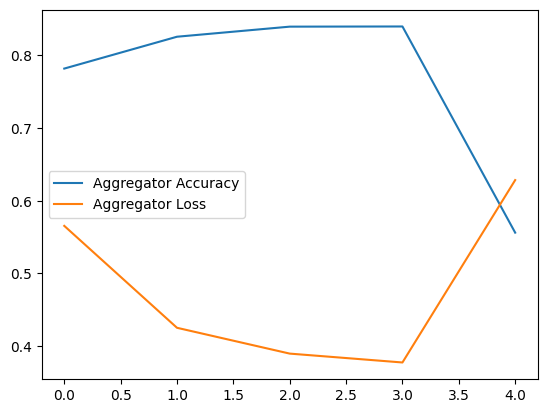

In [119]:
#Visualize federated learning model i.e. final aggregator model
import matplotlib.pyplot as pyplot
pyplot.plot(range(len(aggregator_accuracy)), aggregator_accuracy, label="Aggregator Accuracy")
pyplot.plot(aggregator_loss, label="Aggregator Loss")
pyplot.legend()
pyplot.show()

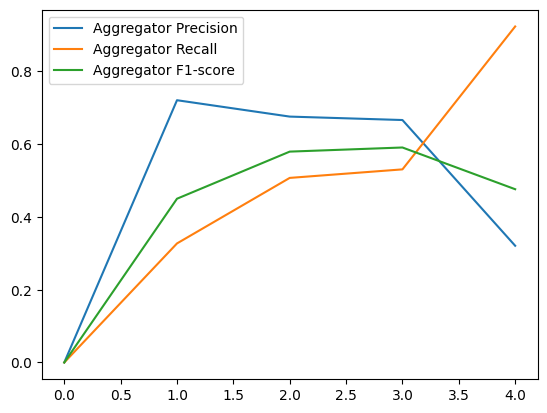

In [120]:
pyplot.plot(range(len(aggregator_precision)), aggregator_precision, label="Aggregator Precision")
pyplot.plot(aggregator_recall, label="Aggregator Recall")
pyplot.plot(aggregator_f1, label="Aggregator F1-score")
pyplot.legend()
pyplot.show()

In [124]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = aggregator_model.predict(x_holdout)
y_pred = (y_pred > 0.5).astype(int)
#cm = confusion_matrix(y_holdout, y_pred)
conf_matrix = pd.DataFrame(confusion_matrix(y_holdout, y_pred), index = ['Actual 0','Actual 1'], columns = ['Predicted 0','Predicted 1'])
conf_matrix

269/269 [==============================] - 1s 2ms/step


,Predicted 0,Predicted 1
Actual 0,3769,2946
Actual 1,216,1661
